In [1]:
# 범주형 - 범주형 구조에 대한 데이터 분석
# 사고유형과 가해자상해정도
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [8]:
accident = pd.read_csv('not_cate_data.csv')

In [5]:
accident.head()

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고날짜,사고시간
0,2014-01-01 00:00:00,수요일,차대차,건조,맑음,단일로,승용,31,상해없음,승용,남,65.0,부상신고,2014-01-01,00:00:00
1,2014-01-01 01:00:00,수요일,차대차,기타,맑음,단일로,승용,32,상해없음,승용,남,54.0,중상,2014-01-01,01:00:00
2,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,26,상해없음,승용,여,26.0,부상신고,2014-01-01,02:00:00
3,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,29,상해없음,승용,남,25.0,경상,2014-01-01,02:00:00
4,2014-01-01 02:00:00,수요일,차대차,건조,맑음,교차로,승용,42,상해없음,승용,남,37.0,경상,2014-01-01,02:00:00


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터프레임 생성 (예시 데이터)
df = accident[['가해운전자 상해정도', '도로형태']]

In [13]:
df.rename(columns={'가해운전자 상해정도': '가해운전자_상해정도'}, inplace=True)

C:\Users\medici\AppData\Local\Temp\ipykernel_26724\1584831683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'가해운전자 상해정도': '가해운전자_상해정도'}, inplace=True)


In [15]:
import pandas as pd
import scipy.stats as stats

# 예시 데이터
# 교차 테이블 생성
contingency_table = pd.crosstab(df['도로형태'], df['가해운전자_상해정도'])

# 카이제곱 독립성 검정
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f'Chi2 Stat: {chi2}')
print(f'p-value: {p}')


Chi2 Stat: 20.50107572973809
p-value: 0.008597759810282197


In [16]:
from scipy.stats import chi2_contingency
def cramers_v(chi2, n):
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

chi2, _, _, _ = chi2_contingency(contingency_table)

# Cramér's V 계산
n = contingency_table.sum().sum()
cramers_v_value = cramers_v(chi2, n)

print(f'Cramér\'s V: {cramers_v_value}')

Cramér's V: 0.02064633051494223


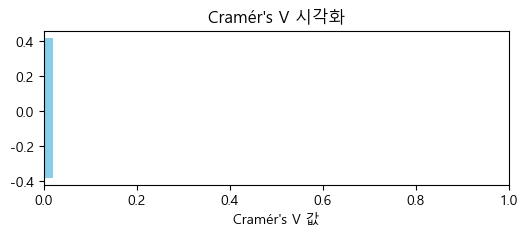

In [19]:
cramers_v= 0.02064633051494223
plt.figure(figsize=(6, 2))
plt.barh([cramers_v], [cramers_v_value], color='skyblue')
plt.xlabel('Cramér\'s V 값')
plt.title('Cramér\'s V 시각화')
plt.xlim(0, 1)  # Cramér's V는 0에서 1 사이의 값
plt.show()

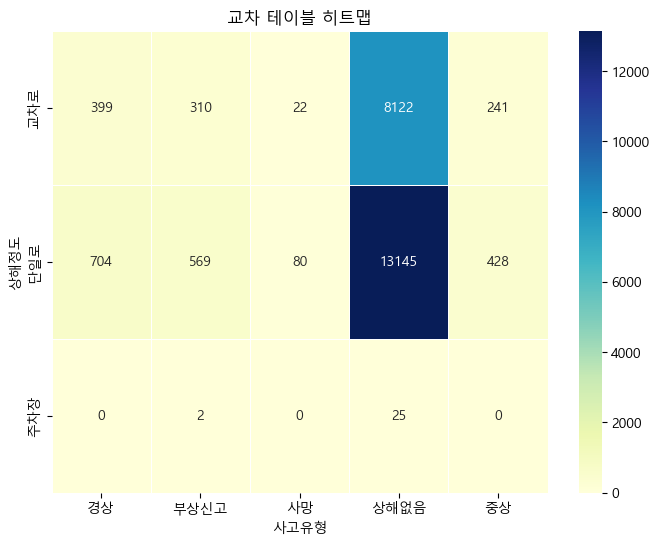

In [20]:
#카이제곱에 대한 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('교차 테이블 히트맵')
plt.xlabel('사고유형')
plt.ylabel('상해정도')
plt.show()

In [22]:
# 교차표 생성
pd.crosstab(df['도로형태'], df['가해운전자_상해정도'])


가해운전자_상해정도,경상,부상신고,사망,상해없음,중상
도로형태,,,,,
교차로,399,310,22,8122,241
단일로,704,569,80,13145,428
주차장,0,2,0,25,0


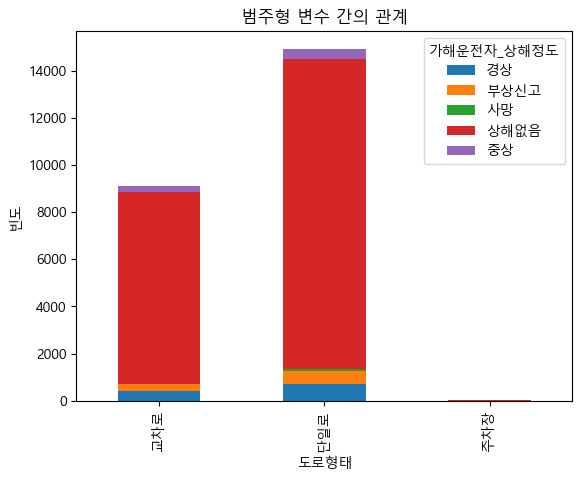

In [23]:
cross_tab = pd.crosstab(df['도로형태'], df['가해운전자_상해정도'])

# 누적 막대 그래프 그리기
cross_tab.plot(kind='bar', stacked=True)
plt.ylabel('빈도')
plt.title('범주형 변수 간의 관계')
plt.show()

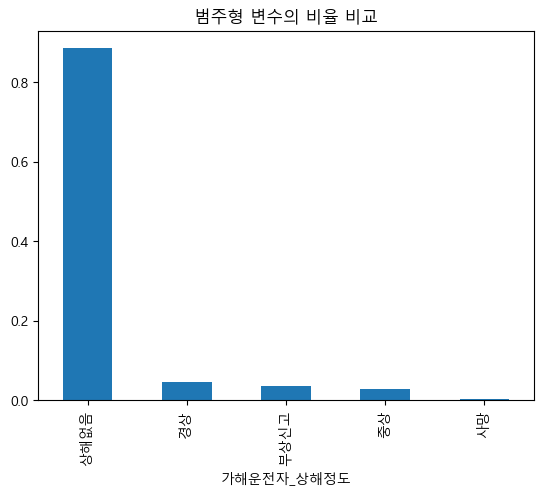

In [25]:
# 범주별 비율 계산
df['가해운전자_상해정도'].value_counts(normalize=True).plot(kind='bar')
plt.title('범주형 변수의 비율 비교')
plt.show()


In [26]:
# 피벗 테이블 생성
pivot_table = df.pivot_table(index='도로형태', columns='가해운전자_상해정도', aggfunc='size', fill_value=0)
print(pivot_table)


가해운전자_상해정도   경상  부상신고  사망   상해없음   중상
도로형태                                 
교차로         399   310  22   8122  241
단일로         704   569  80  13145  428
주차장           0     2   0     25    0


In [34]:
from statsmodels.discrete.discrete_model import MNLogit
df['가해운전자_상해정도_수치'] = df['가해운전자_상해정도'].astype('category').cat.codes

# 독립 변수와 종속 변수 정의
X = pd.get_dummies(df['도로형태'], drop_first=True)  # 독립변수
y = df['가해운전자_상해정도_수치']  # 종속변수

# 다항 로지스틱 회귀 모델 정의
model = MNLogit(y, sm.add_constant(X))  # 상수항 추가
result = model.fit()

# 결과 출력
print(result.summary())

C:\Users\medici\AppData\Local\Temp\ipykernel_26724\553725669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가해운전자_상해정도_수치'] = df['가해운전자_상해정도'].astype('category').cat.codes


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).